In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\patrick.wool_storabl\Downloads\AmesHousing.csv")

df.head()


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [2]:
# find % of how many values are missing  per column

# df.isna().mean().pipe(lambda x:x[x>0])

In [3]:
#view all data based on missing data from specific column while alse specificing amount of rows and columns to view

# with pd.option_context('display.min_rows',30,'display.max_columns',82):
#     display(df.query('`Lot Frontage`.isna()'))

<Axes: ylabel='MS Zoning'>

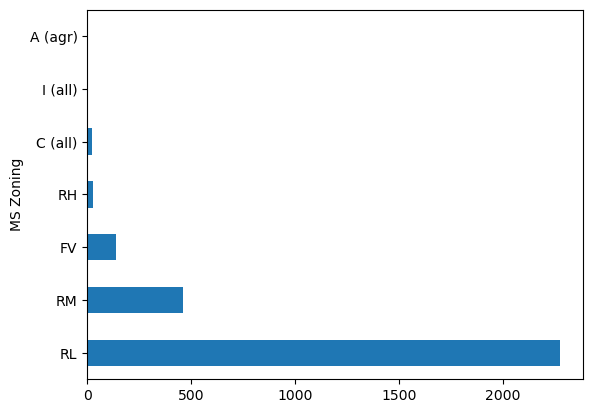

In [4]:
Zones = df['MS Zoning'].value_counts().plot.barh()
Zones

In [5]:
df.SalePrice.describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: >

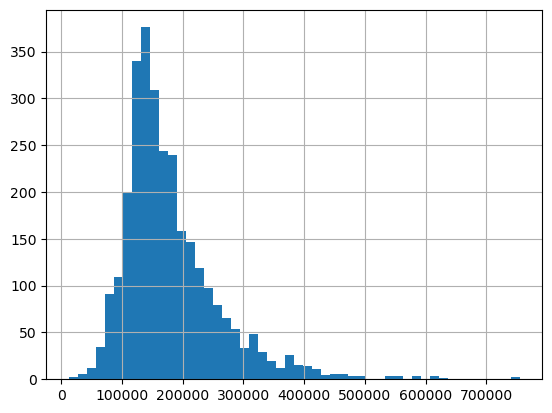

In [6]:
df.SalePrice.hist(bins=50)

In [7]:
def calc_z(df, col):
    mean = df[col].mean()
    std = df[col].std()
    return (df[col] - mean) / std

df.pipe(calc_z, col = 'SalePrice')

0       0.428156
1      -0.948795
2      -0.110107
3       0.791170
4       0.113961
          ...   
2925   -0.479380
2926   -0.623334
2927   -0.610816
2928   -0.135142
2929    0.090177
Name: SalePrice, Length: 2930, dtype: float64

In [8]:
df.assign(z_score = calc_z(df,'SalePrice'))

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,z_score
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,5,2010,WD,Normal,215000,0.428156
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000,-0.948795
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000,-0.110107
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,4,2010,WD,Normal,244000,0.791170
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900,0.113961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500,-0.479380
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000,-0.623334
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000,-0.610816
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,4,2006,WD,Normal,170000,-0.135142


In [9]:
df.assign(z_score = calc_z(df,'SalePrice')).query('z_score.abs() >= 3').head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,z_score
15,16,527216070,60,RL,47.0,53504,Pave,NaN,IR2,HLS,...,NaN,NaN,NaN,0,6,2010,WD,Normal,538000,4.471382
44,45,528150070,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,3,2010,New,Partial,611657,5.393401
46,47,528176010,20,RL,110.0,14300,Pave,NaN,Reg,HLS,...,NaN,NaN,NaN,0,6,2010,WD,Normal,500000,3.995709
366,367,527214050,20,RL,63.0,17423,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,7,2009,New,Partial,501837,4.018704
421,422,528102140,60,RL,110.0,14257,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,6,2009,WD,Normal,462000,3.520035


In [10]:
def calc_iqr_outlier(df,col):
    ser = df[col]
    iqr = ser.quantile(.75) - ser.quantile(.25)
    med = ser.median()
    low = ser < med - iqr * 3
    high = ser > med + iqr * 3
    return low | high

df.assign(iqr_outlier = calc_iqr_outlier(df,'SalePrice')).head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,iqr_outlier
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,5,2010,WD,Normal,215000,False
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000,False
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000,False
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,4,2010,WD,Normal,244000,False
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900,False


In [11]:
df.assign(iqr_outlier = calc_iqr_outlier(df,'SalePrice')).query('iqr_outlier').head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,iqr_outlier
15,16,527216070,60,RL,47.0,53504,Pave,NaN,IR2,HLS,...,NaN,NaN,NaN,0,6,2010,WD,Normal,538000,True
44,45,528150070,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,3,2010,New,Partial,611657,True
46,47,528176010,20,RL,110.0,14300,Pave,NaN,Reg,HLS,...,NaN,NaN,NaN,0,6,2010,WD,Normal,500000,True
366,367,527214050,20,RL,63.0,17423,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,7,2009,New,Partial,501837,True
421,422,528102140,60,RL,110.0,14257,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,6,2009,WD,Normal,462000,True


In [12]:
df.corr(method='spearman',numeric_only=True).style.background_gradient(cmap='RdBu',vmin = -1, vmax = 1)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.205863,0.015074,-0.024209,0.012684,-0.049175,-0.015534,-0.056978,-0.084144,-0.041604,-0.034229,-0.018105,0.007011,-0.023661,-0.007155,-0.003142,0.026532,-0.023809,-0.041665,0.019375,-0.048754,-0.036492,0.014230,-0.015031,0.001629,-0.022008,-0.056211,-0.037003,-0.034251,-0.025811,0.000760,0.025225,-0.015117,0.006032,0.047986,-0.038106,0.142150,-0.977264,-0.035703
PID,0.205863,1.000000,-0.026875,-0.096820,-0.040342,-0.314353,0.111922,-0.314979,-0.208414,-0.237169,-0.050349,0.012860,-0.131413,-0.188111,-0.130427,-0.069092,0.047204,-0.165111,-0.009074,0.035377,-0.235566,-0.186542,-0.014036,0.084954,-0.130301,-0.151539,-0.274242,-0.276663,-0.207054,-0.092368,-0.176972,0.152769,0.005809,0.006353,0.003222,0.018754,-0.051290,0.003198,-0.270660
MS SubClass,0.015074,-0.026875,1.000000,-0.363408,-0.320550,0.103475,-0.065550,0.035632,0.015590,-0.009247,-0.098222,-0.093004,-0.113501,-0.300856,-0.278139,0.478281,0.059254,0.186612,-0.040172,0.004709,0.198671,0.266447,0.056779,0.269444,0.137183,0.010696,0.084325,0.020071,-0.047607,0.019062,0.030639,-0.005318,-0.033196,-0.039486,-0.001964,-0.031959,0.014999,-0.021873,0.001973
Lot Frontage,-0.024209,-0.096820,-0.363408,1.000000,0.659412,0.223162,-0.104785,0.192888,0.134932,0.275334,0.156582,0.044513,0.092700,0.375535,0.442289,0.000692,-0.042646,0.361933,0.103704,-0.029865,0.209843,0.077310,0.288409,0.010360,0.362169,0.248728,0.126930,0.348630,0.375849,0.118401,0.173802,-0.092787,0.010447,0.086195,0.083211,0.037856,0.013041,0.003559,0.397980
Lot Area,0.012684,-0.040342,-0.320550,0.659412,1.000000,0.196855,-0.079006,0.121151,0.103266,0.205822,0.171376,0.057461,0.068211,0.352739,0.439129,0.064565,-0.016875,0.418321,0.106726,0.009234,0.224679,0.128025,0.298550,-0.025662,0.383795,0.311907,0.073598,0.344115,0.370980,0.177609,0.171777,-0.042467,0.029028,0.091527,0.083071,0.073861,0.004774,-0.021720,0.429249
Overall Qual,-0.049175,-0.314353,0.103475,0.223162,0.196855,1.000000,-0.189638,0.664590,0.579323,0.423202,0.179239,-0.091898,0.239273,0.472852,0.415988,0.237677,-0.050242,0.577780,0.148886,-0.047082,0.556720,0.294043,0.077886,-0.170318,0.378023,0.419263,0.638166,0.611424,0.547140,0.290231,0.440433,-0.192093,0.019398,0.026212,0.033057,-0.076443,0.029163,-0.017015,0.808800
Overall Cond,-0.015534,0.111922,-0.065550,-0.104785,-0.079006,-0.189638,1.000000,-0.422306,-0.075119,-0.181996,-0.020644,0.095954,-0.123413,-0.223382,-0.187027,-0.012957,0.018427,-0.189100,-0.045087,0.089080,-0.282743,-0.106949,-0.012151,-0.084478,-0.126437,-0.056648,-0.395204,-0.258175,-0.216048,-0.036363,-0.175446,0.134745,0.044303,0.050333,-0.020386,0.061434,-0.006480,0.039612,-0.165657
Year Built,-0.056978,-0.314979,0.035632,0.192888,0.121151,0.664590,-0.422306,1.000000,0.707678,0.398747,0.214515,-0.095639,0.124441,0.442113,0.324522,0.022695,-0.123324,0.317367,0.187555,-0.054695,0.536116,0.265468,-0.032275,-0.129373,0.181709,0.199048,0.900386,0.600675,0.533612,0.296569,0.402890,-0.434250,0.011180,-0.066507,0.004203,-0.079103,0.016111,-0.009527,0.680822
Year Remod/Add,-0.084144,-0.208414,0.015590,0.134932,0.103266,0.579323,-0.075119,0.707678,1.000000,0.249285,0.087763,-0.116761,0.167045,0.309842,0.250180,0.090110,-0.058727,0.318917,0.120280,-0.057018,0.455856,0.179883,-0.032359,-0.144737,0.207894,0.148938,0.742208,0.460615,0.409481,0.249966,0.372293,-0.268871,0.049288,-0.058677,-0.011139,-0.057701,0.014296,0.041084,0.601454
Mas Vnr Area,-0.041604,-0.237169,-0.009247,0.275334,0.205822,0.423202,-0.181996,0.398747,0.249285,1.000000,0.270651,-0.028671,0.055245,

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

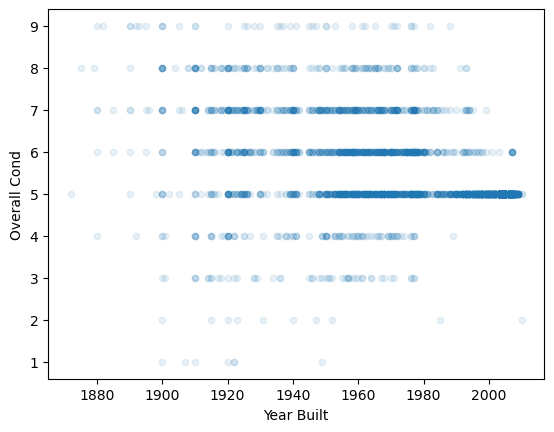

In [13]:
df.plot.scatter(x= 'Year Built', y = 'Overall Cond', alpha = 0.1)

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

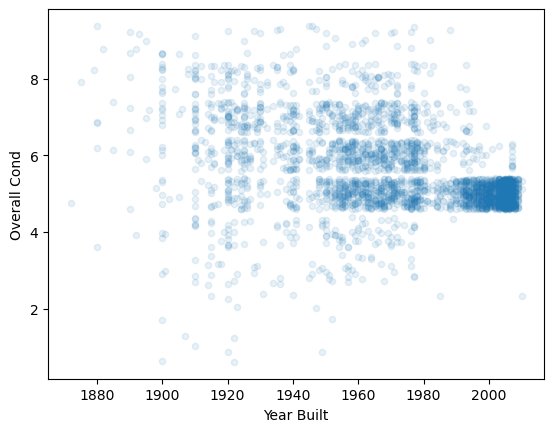

In [14]:
df.assign(**{'Overall Cond': df['Overall Cond'] + np.random.random(len(df)) * .8 - .4}).plot.scatter(x= 'Year Built', y = 'Overall Cond', alpha = 0.1)

<Axes: >

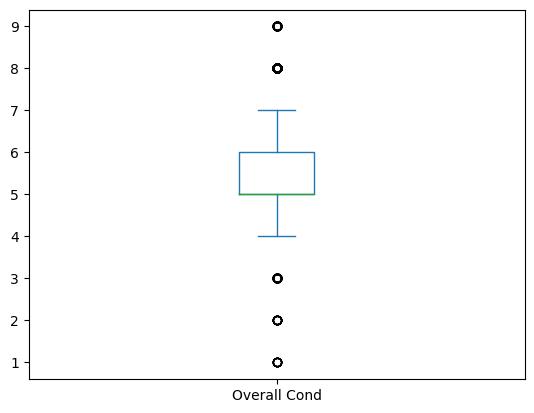

In [15]:
(df.plot.box(x= 'Year Built', y = 'Overall Cond'))

<Axes: >

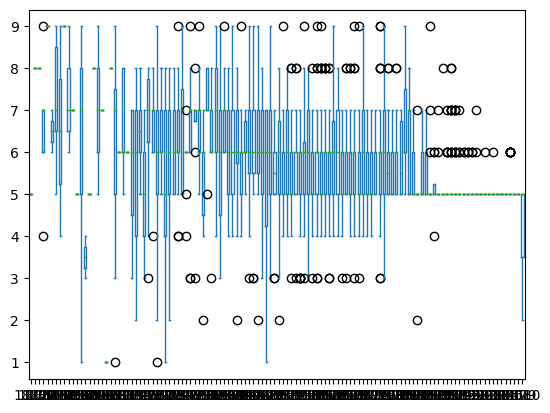

In [16]:
(df.pivot(columns = 'Year Built', values = 'Overall Cond').apply(lambda ser: ser[~ser.isna()].reset_index(drop=True)).plot.box())

<Axes: >

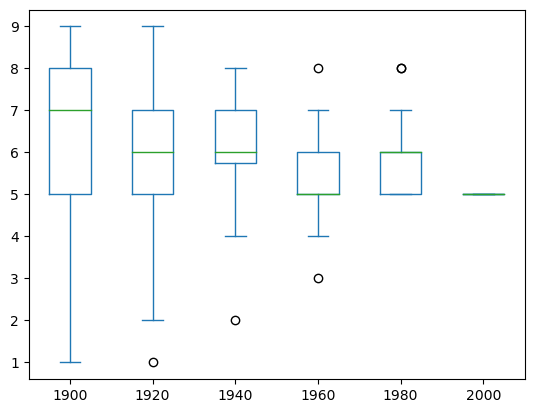

In [23]:
(df.pivot(columns = 'Year Built', values = 'Overall Cond').apply(lambda ser: ser[~ser.isna()].reset_index(drop=True))
 .loc[:,[1900,1920,1940,1960,1980,2000]].plot.box())

<Axes: >

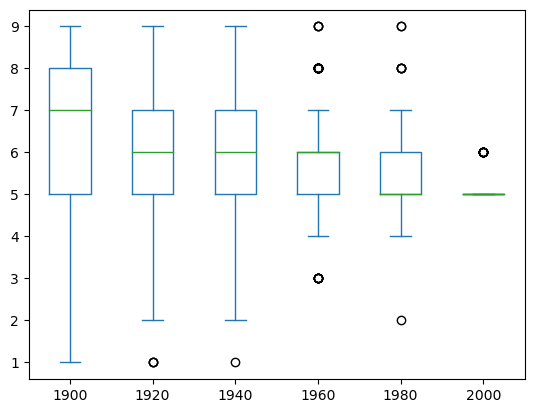

In [25]:
(df.assign(decade = (df['Year Built']//10)*10).pivot(columns = 'decade', values = 'Overall Cond').apply(lambda ser: ser[~ser.isna()].reset_index(drop=True))
 .loc[:,[1900,1920,1940,1960,1980,2000]].plot.box())

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

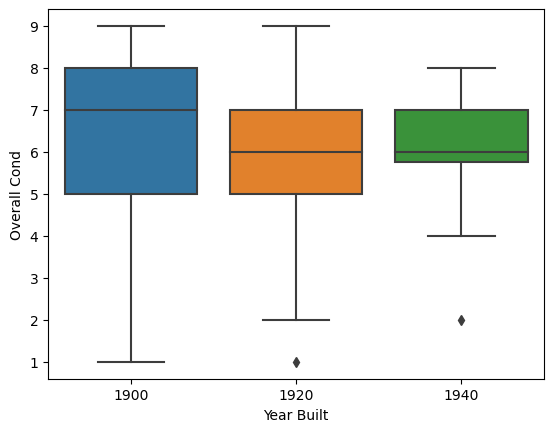

In [26]:
import seaborn as sns

sns.boxplot(data=df, x = 'Year Built',y = 'Overall Cond', order = [1900,1920,1940])

In [29]:
df.groupby(['Overall Qual','Bsmt Cond']).size().unstack().fillna(0).astype('int32')

Bsmt Cond,Ex,Fa,Gd,Po,TA
Overall Qual,,,,,
1,0,0,0,1,0
2,0,4,0,0,5
3,0,9,0,0,21
4,0,16,2,1,182
5,1,39,24,2,727
6,1,28,28,0,672
7,0,5,33,0,561
8,1,3,25,1,320
9,0,0,9,0,98


In [34]:
pd.crosstab(df['Overall Qual'],df['Bsmt Cond']).loc[:,['Ex','Gd','TA','Fa','Po']].style.background_gradient(cmap = 'viridis',axis=None)

Bsmt Cond,Ex,Gd,TA,Fa,Po
Overall Qual,,,,,
1,0,0,0,0,1
2,0,0,5,4,0
3,0,0,21,9,0
4,0,2,182,16,1
5,1,24,727,39,2
6,1,28,672,28,0
7,0,33,561,5,0
8,1,25,320,3,1
9,0,9,98,0,0


<Axes: xlabel='Overall Qual'>

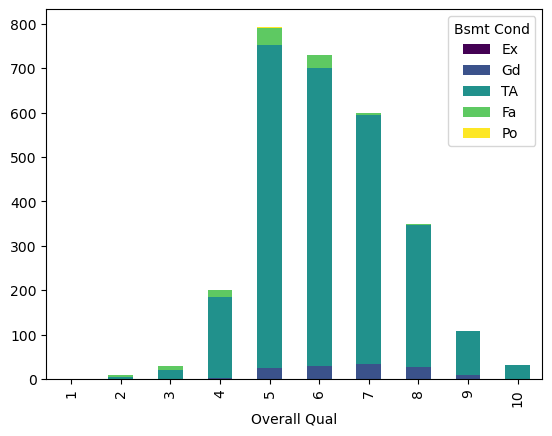

In [35]:
pd.crosstab(df['Overall Qual'],df['Bsmt Cond']).loc[:,['Ex','Gd','TA','Fa','Po']].plot.bar(stacked=True,cmap='viridis')